# Feature Engineering with NLP

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/fakenews.csv')

In [ ]:
df.head()

ML Algorithms expect numeric features to work. Thats why we have to preprocess free text and extract features from them in order to use them.

# Basic Feature extraction

## Number of characters 

In [ ]:
text = 'I dont know' 

print('Num chars: ', len(text)) 

In [ ]:
df['length'] = df['title'].str.len()
df.head()

## Number of words 

In [ ]:
text = "Mary has a little lamb."

words = text.split()

print(len(words))

In [ ]:
def number_of_words(text):
    
    words = text.split()
    
    return(len(words))

df['number_of_words'] = df['title'].apply(lambda x: number_of_words(x))

df.head()

## Average lenght of words 

In [ ]:
def avg_length_of_words(text):
    
    words = text.split()
    words_length = [len(word) for word in words]
    
    return np.mean(words_length)

df['avg_length_of_words'] = df['title'].apply(lambda x: avg_length_of_words(x))

df.head()

# Readability tests 

The readability tests determine how skilled a person has to be in order to read a specific text. 

Its a mathematical formula utilizing word, syllable and sentence count 

The following methods do apply to english texts only.

## Flesch reading ease 

Its one of the oldest and most widely used tests 

It depends on two factors: 
- Greater the average sentence lenght, harder the text is to read
- Greater the average number of syllables in a word, harder the text is to read

The higher the score, the greater the readibility.

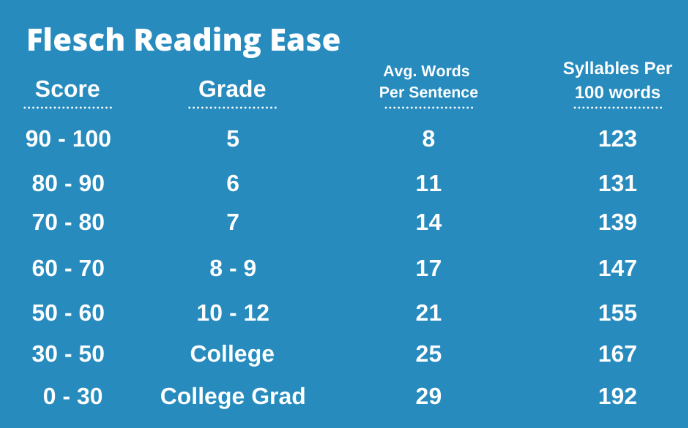

## Gunning Fog index 

Also dependent on average sentence lenght

Greater the percentage of complex words, harder the text is to read 

The higher the score, the harder the text is to read 

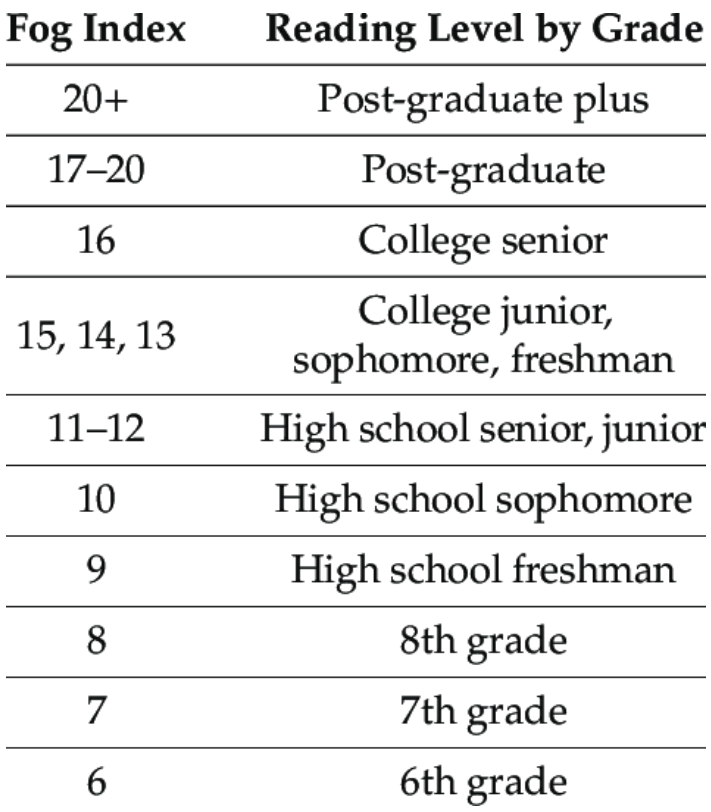

## The Textatistic library 

It implements these tests 


In [ ]:
from textatistic import Textatistic 

readibility_scores = Textatistic(text).scores

print(readibility_scores['flesch_score'])
print(readibility_scores['gunningfog_score'])


# Tokenization

Its the process of splitting the text into smaller tokens, being these sentences, words or punctuations.

It also involves expanding words into their uncontracted form ('don't' into 'do' and "n't")

In [ ]:
import spacy 

nlp = spacy.load('en_core_web_sm')

string = "Hello! I don't know what I'm doing here."

doc = nlp(string)

tokens = [token.text for token in doc]

print(tokens)

# Lemmatization 

Convert a word into its base form.

The words 'reducing', 'reduces', 'reduced', 'reduction' become 'reduce' after lemmatization.


In [ ]:
lemmas = [token.lemma_ for token in doc]

print(lemmas)

# Text Cleaning

Once we have the lemmas we can proceed to clean the text.

Usual cleaning techniques are: 
- Unnecessary whitespaces and escape sequences
- Punctuations
- Special Characters
- Stopwords


In [ ]:
"Dog".isalpha()

In [ ]:
"3Dog".isalpha()

In [ ]:
"Dog?".isalpha()

In [ ]:
"Dog!".isalpha()

In [ ]:
":Dog".isalpha()

In [ ]:
"-Dog".isalpha()

The *.isalhpa()* method is very useful to identify lemmas that are not words.

Please not that words as 'U.S.A' or 'U.K', 'word2vec', 'xto10x'... would be flagged as not alphabetic.

If the presence of words of this kind is notorious in our corpus, it would be recommended to craft our own isalpha implementation making use of regular expressions.

In [ ]:
string = """
OMG! !!! This is like the best thing ever t\n.
Wow, such an amazing song! I'm hooked. Top 5 definitely. ?
"""
doc = nlp(string)

lemmas = [token.lemma_ for token in doc]

print(lemmas)

In [ ]:
a_lemmas = [a_lemma for a_lemma in lemmas if a_lemma.isalpha()]
print(' '.join(a_lemmas))

# Stopwords 

There are some words in the english language that are that commin that its a good idea not to take them into account: articles, be verbs, pronouns...




In [ ]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS

a_lemmas = [a_lemma for a_lemma in a_lemmas if a_lemma not in stop_words]
print(' '.join(a_lemmas))


> Be careful when using third party stop word lists

# Other text preprocessing techniques 

Removing HTML/XML tags

Replacing accented chars

Correcting spelling errors

# Part Of Speech tagging (PoS tagging)

Process of assigning the function of a word in a sentence.



In [ ]:
import spacy 

nlp = spacy.load('en_core_web_sm')

string = "Jane is an amazing guitarist."

doc = nlp(string)

pos = [(token.text, token.pos_) for token in doc] 

print(pos)


[PoS annotations in spacy](https://spacy.io/usage/linguistic-features)

# Named Entity Recognition (NER)

Process of identify named entities and categorized them within a given text.

In [ ]:
import spacy 

nlp = spacy.load('en_core_web_sm')

string = "John Doe is a software engineer working at Google. He lives in France."

doc = nlp(string) 

ents = [(ent.text, ent.label_) for ent in doc.ents]

print(ents)

> Spacy models are not perfect and language specific. Eventually, a training on specific domain would be advisable.

# Bag of Words (BoW) Technique

The **Bag of Words (BoW)** is a simple and commonly used technique in natural language processing (NLP) to represent text data. It transforms text into numerical features by treating each word as an independent token and ignoring grammar and word order. The basic idea is to create a vocabulary of all unique words from a set of documents and then represent each document as a vector of word counts.

### How it Works:
1. **Tokenization**: Break each document into individual words (tokens).
2. **Vocabulary Creation**: Build a vocabulary containing all unique words across the documents.
3. **Vector Representation**: For each document, count the occurrence of each word in the vocabulary and represent the document as a vector of these counts.

BoW captures the frequency of words but loses information about the context or meaning.

### Example:

Let's consider two simple sentences:
1. "I love pizza"
2. "I love pasta"

#### Step 1: Vocabulary Creation  
From the two sentences, we create the vocabulary:
- [I, love, pizza, pasta]

#### Step 2: Vector Representation  
Now we represent each sentence as a vector of word counts:

| Sentence        | I  | love | pizza | pasta |
|-----------------|----|------|-------|-------|
| "I love pizza"  | 1  | 1    | 1     | 0     |
| "I love pasta"  | 1  | 1    | 0     | 1     |

Each row represents a sentence, and the numbers show how many times each word from the vocabulary appears in that sentence.

BoW is simple to implement and useful for many text classification tasks, although it doesn't capture word order or semantic meaning.

Using **text preprocessing** before implementing the bag of words end up in a smaller vocabulary, with similar words using a single feature, no stopwords...


In [ ]:
corpus = pd.Series([
    'The lion is the king of the jungle', 
    'Lions have lifespans of a decade', 
    'The lion is an endangered species'
])

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

bow_matrix = vectorizer.fit_transform(corpus)

print(bow_matrix.toarray())

In [ ]:
vectorizer.vocabulary_

In [ ]:
bow_df = pd.DataFrame(bow_matrix.toarray())
bow_df.columns = vectorizer.get_feature_names_out()
bow_df

# Building a Bag of Words Naive Bayes classifier

1. Text preprocessing
2. Building the BoW
3. Machine Learning



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X = df[['title']]
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

X_train_bow = vectorizer.fit_transform(X_train)

X_test_bow = vectorizer.transform(X_test)

print(X_train_bow.shape)
print(X_test_bow.shape)

In [ ]:
X_train_bow.toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

In [ ]:
X

> The problem of the bag of words approach is that any context of a word is lost. 'Nice' would count the same in a 'is very nice' excerpt than in a 'is not nice at all'.

# N-Grams Technique

**N-Grams** is a technique used in natural language processing (NLP) to represent text as a sequence of *n* words (or tokens). Unlike the Bag of Words (BoW) method, which ignores word order, N-Grams captures consecutive word sequences, helping to maintain some level of context.

### How it Works:
- **Unigrams**: Individual words (n = 1).
- **Bigrams**: Pairs of consecutive words (n = 2).
- **Trigrams**: Triplets of consecutive words (n = 3).
- Higher-order N-Grams: Groups of *n* consecutive words.

N-Grams are particularly useful in tasks where word order or local context matters, such as text generation, machine translation, and sentiment analysis.

### Example:

Consider the sentence:
- "I love pizza"

#### Unigrams (n = 1):
- ["I", "love", "pizza"]

#### Bigrams (n = 2):
- ["I love", "love pizza"]

#### Trigrams (n = 3):
- ["I love pizza"]

Each level of N-Grams captures a different amount of context. Unigrams treat words independently, while bigrams and trigrams capture word pairs and triplets, preserving some context and word relationships.

### Application Example:

For two sentences:
1. "I love pizza"
2. "I love pasta"

We can represent them using bigrams:

| Sentence        | "I love" | "love pizza" | "love pasta" |
|-----------------|----------|--------------|--------------|
| "I love pizza"  | 1        | 1            | 0            |
| "I love pasta"  | 1        | 0            | 1            |

N-Grams allow for a more contextual understanding of the text, especially compared to simpler models like Bag of Words.

Using n-grams with countVectorizer is as simple as indicating the ngram range to take into account:a_lemmas `CountVectorizer(ngram_range=(1,1))`

# Introduction to the TF-IDF Technique

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a popular method in natural language processing (NLP) to evaluate the importance of a word in a document relative to a collection of documents (corpus). Unlike the Bag of Words (BoW) model, which counts raw word frequencies, TF-IDF balances word frequency with how unique or common a word is across the entire corpus.

### How it Works:
1. **Term Frequency (TF)**: Measures how frequently a word appears in a document.  
   \[
   \text{TF} = \frac{\text{Number of times a word appears in a document}}{\text{Total words in the document}}
   \]

2. **Inverse Document Frequency (IDF)**: Measures how unique a word is across all documents in the corpus.  
   \[
   \text{IDF} = \log \left(\frac{\text{Total number of documents}}{\text{Number of documents containing the word}}\right)
   \]

3. **TF-IDF Score**: The TF-IDF score is computed by multiplying TF by IDF. Words that occur frequently in a single document but are rare across the corpus will have a high TF-IDF score, indicating their importance in that document.

### Example:

Consider a corpus with two sentences:
1. "I love pizza"
2. "I love pasta"

#### Step 1: Term Frequency (TF)
- In both documents, "I" and "love" occur twice, and "pizza" and "pasta" occur once.

#### Step 2: Inverse Document Frequency (IDF)
- Common words like "I" and "love" will have a lower IDF since they appear in both sentences, while "pizza" and "pasta" will have higher IDFs because they are unique to their respective documents.

#### TF-IDF Calculation (Simplified):
For the word **"pizza"**:
- **TF(pizza, doc1)** = 1/3 (since "pizza" appears once in a document with 3 words)
- **IDF(pizza)** = log(2/1) = log(2)
- **TF-IDF(pizza)** = (1/3) * log(2)

For **"love"**:
- **TF(love, doc1)** = 1/3
- **IDF(love)** = log(2/2) = log(1) = 0 (since "love" appears in both documents)
- **TF-IDF(love)** = (1/3) * 0 = 0

### Application:
Using TF-IDF, we can rank the words based on their importance in a document. Words that are more frequent within a document but rare across the corpus, such as "pizza" or "pasta", will be highlighted, while common words like "I" and "love" will be down-weighted.

This method is especially useful in tasks such as document classification, information retrieval, and keyword extraction.

# Introduction to Cosine Similarity with TF-IDF

**Cosine Similarity** is a technique used to measure the similarity between two documents by calculating the cosine of the angle between their vector representations. When combined with **TF-IDF (Term Frequency-Inverse Document Frequency)**, it helps compare documents based on the importance of words while ignoring common or irrelevant terms.

The cosine similarity score ranges from:
- **1** (perfect similarity) when the documents are identical,
- **0** when the documents are orthogonal (no similarity).

### How Cosine Similarity Works with TF-IDF:
1. **TF-IDF Vectors**: First, each document is transformed into a **TF-IDF vector** where each dimension corresponds to a word’s TF-IDF score in that document.
2. **Cosine Similarity**: The cosine similarity between two TF-IDF vectors is calculated as:

$$
\text{Cosine Similarity} = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}
$$

Where:
- $ \mathbf{A} $ and $ \mathbf{B} $ are the TF-IDF vectors of the two documents,
- $ \mathbf{A} \cdot \mathbf{B} $ is the dot product of the two vectors,
- $ \|\mathbf{A}\| $ and $ \|\mathbf{B}\| $ are the magnitudes of the vectors.

### Example:

Consider the following two documents:
1. **Doc1**: "I love pizza"
2. **Doc2**: "I love pasta"

#### Step 1: Compute TF-IDF Vectors
After calculating the TF-IDF values, we might have vectors like this (simplified):

- **Doc1 (TF-IDF)**: $[0.58, 0.58, 0.58, 0.00]$ (for "I", "love", "pizza", "pasta")
- **Doc2 (TF-IDF)**: $[0.58, 0.58, 0.00, 0.58]$ (for "I", "love", "pizza", "pasta")

#### Step 2: Cosine Similarity
To calculate the cosine similarity between **Doc1** and **Doc2**:

$$
\text{Cosine Similarity} = \frac{(0.58 \times 0.58) + (0.58 \times 0.58) + (0.58 \times 0) + (0 \times 0.58)}{\sqrt{(0.58^2 + 0.58^2 + 0.58^2 + 0^2)} \times \sqrt{(0.58^2 + 0.58^2 + 0^2 + 0.58^2)}}
$$

The result would be a score between 0 and 1, indicating how similar these two documents are. In this case, since the documents share two words, the cosine similarity score will be relatively high but less than 1 due to the different words "pizza" and "pasta."

### Application:
Using TF-IDF with cosine similarity is a powerful way to:
- **Detect document similarity** (e.g., for duplicate detection),
- **Find relevant documents** in a search query,
- **Cluster documents** based on content.

This combination is widely used in search engines, text classification, and recommendation systems.

# Introduction to Word Embeddings

**Word embeddings** are numerical representations of words that capture their meanings and relationships in a continuous vector space. Unlike traditional methods such as Bag-of-Words or TF-IDF, which only capture frequency-based information, word embeddings are able to represent semantic meaning and context.

### Key Concepts:
- **Dimensionality**: Word embeddings are typically represented as vectors in an n-dimensional space (e.g., 100 or 300 dimensions). Each dimension corresponds to a feature learned from the surrounding context of the words.
- **Contextual Similarity**: Words that appear in similar contexts tend to have similar vector representations. This allows for the capture of relationships such as synonyms, antonyms, and analogies.

### Popular Word Embedding Models:
- **Word2Vec**: Trained on large corpora, it uses techniques like Continuous Bag-of-Words (CBOW) or Skip-gram to generate word vectors based on the context of neighboring words.
- **GloVe**: Stands for Global Vectors for Word Representation. It uses word co-occurrence matrices to generate vectors and captures both global and local contexts of words.
- **FastText**: Extends Word2Vec by representing words as subword units, improving performance for rare or unseen words.

### Example:

In a word embedding space, the relationships between words can be visualized through vector arithmetic. For example:

$$
\text{king} - \text{man} + \text{woman} \approx \text{queen}
$$

This shows that the vector difference between "king" and "man" is similar to the difference between "queen" and "woman", capturing semantic relationships.

### Applications of Word Embeddings:
- **Text Classification**: Representing documents in terms of word embeddings helps machine learning models understand their semantic content.
- **Information Retrieval**: Embeddings help find similar documents or sentences based on the meaning of words.
- **Machine Translation**: By capturing word meanings, word embeddings facilitate better translation between languages.

Word embeddings have revolutionized the way computers understand and process text, forming the foundation for modern natural language processing tasks.